## Sentiment Analysis Using Supervised Learning Approach
Purpose: To use Machine Learning Method, using TFIDF Vectorizer to vectorize the corpus, to predict labels

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

### 1. Read data from prelabelled data

In [2]:
f = '../../data/sentiment_data/labelled_data/labelled.csv'
df = pd.read_csv(f, index_col=0)

# Filter out Class 0: aka Neutral
df = df[df['Class'] != 0]
df.reset_index(inplace=True, drop=True)
df

,Date,Original,Corpus,Class
0,2003-12-09,consequence sales profits stock prices higher ...,consequence sale profit stock price high liqui...,-1
1,2003-12-09,even though unemployment rate projected declin...,even though unemployment rate project decline ...,-1
2,2003-12-09,assessments individual members likely pace exp...,assessment individual member likely pace expan...,-1
3,2003-12-09,downside risks outlook diminished members rema...,downside risk outlook diminish member remain c...,-1
4,2003-12-09,rapid productivity growth also could limit emp...,rapid productivity growth also could limit emp...,-1
...,...,...,...,...
2533,2017-06-14,labor market conditions continued strengthen r...,labor market condition continued strengthen re...,1
2534,2017-06-14,unemployment rate fell,unemployment rate fell,1
2535,2017-06-14,information received since federal open market...,information receive since federal open market ...,1
2536,2017-06-14,job gains moderated solid average since beginn...,job gain moderate solid average since begin ye...,1


### 2. Preprocessing of dataset
- Encode the 'Class' column to integers
- Split dataset into train and test

In [3]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

le = LabelEncoder()
df['Class_Label'] = le.fit_transform(df['Class'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['Corpus']], df['Class_Label'], shuffle=True, test_size=0.30)

### 3. Classification Models

### TfidfVectorizer For Corpus

In [5]:
pipeline = Pipeline([
                     ('tfidf', TfidfVectorizer()),
                     ('logreg', LogisticRegression(solver='lbfgs'))
])

pipeline.fit(X_train.Corpus, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scal

In [6]:
metrics.accuracy_score(y_test, pipeline.predict(X_test.Corpus))

0.7559055118110236

In [7]:
%%time

parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1,3)],
    'tfidf__max_df': np.linspace(0.16, 0.21, 6),
    'tfidf__min_df': range(7, 15),
}

clf = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=5)
clf.fit(X_train.Corpus, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   32.6s


[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.735, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.724, total=   0.3s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3), score=0.697, total=   0.5s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3), score=0.710, total=   0.6s
[CV] tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 2), score=0.732, total=   0.3s
[CV] tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 3), score=0.749, total=

[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 1), score=0.691, total=   0.2s[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.755, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.699, total=   0.3s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.715, total=   0.3s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3), score=0.744, total=   0.5s
[CV] tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 1), score=0.724, total=   0.2s
[CV] tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1

[CV]  tfidf__max_df=0.17, tfidf__min_df=11, tfidf__ngram_range=(1, 3), score=0.721, total=   0.6s[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.738, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.721, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.738, total=   0.3s
[CV] tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=7, tfidf__ngram_range=(1, 3), score=0.752, total=   0.6s
[CV] tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 1), score=0.741, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.0s



[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 1), score=0.690, total=   0.4s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 2), score=0.741, total=   0.3s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.705, total=   0.7s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.694, total=   0.1s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.735, total=   0.1s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 2), score=0.697,

[CV]  tfidf__max_df=0.19, tfidf__min_df=8, tfidf__ngram_range=(1, 2), score=0.724, total=   0.3s
[CV] tfidf__max_df=0.17, tfidf__min_df=11, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=11, tfidf__ngram_range=(1, 3), score=0.713, total=   0.8s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 2), score=0.710, total=   0.3s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.741, total=   0.7s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.730, total=   0.1s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.718, total=   0.2s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_ra

[CV]  tfidf__max_df=0.19, tfidf__min_df=8, tfidf__ngram_range=(1, 3), score=0.715, total=   0.5s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 1), score=0.727, total=   0.4s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 2), score=0.704, total=   0.3s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.704, total=   0.6s
[CV] tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.699, total=   0.6s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_range=(1, 2), score=0.710, total=   0.3s
[CV] tfidf__max_df=0.17, tfidf__min_df=13, tfidf__ngram_ra

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min


CPU times: user 4.03 s, sys: 244 ms, total: 4.27 s
Wall time: 1min 19s


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [8]:
clf.best_params_

{'tfidf__max_df': 0.2, 'tfidf__min_df': 8, 'tfidf__ngram_range': (1, 2)}

#### Tune with an updated set of parameter space
(To provide a more conclusive results)

In [9]:
parameters_updated = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_df': np.linspace(0.16, 0.30, 6),
    'tfidf__min_df': range(5, 15),
}

In [10]:
clf_updated = GridSearchCV(pipeline, parameters_updated, n_jobs=-1, verbose=5)
clf_updated.fit(X_train.Corpus, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s



[CV] tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 2), score=0.727, total=   0.3s
[CV] tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 3), score=0.746, total=   0.6s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1), score=0.719, total=   0.1s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1), score=0.735, total=   0.2s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 2), score=0.735, total=   0.3s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 3), score=0.702, t

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.0s



[CV] tfidf__max_df=0.19, tfidf__min_df=8, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=8, tfidf__ngram_range=(1, 3), score=0.730, total=   0.5s
[CV] tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 1), score=0.735, total=   0.1s
[CV] tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 2), score=0.741, total=   0.3s
[CV] tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 3), score=0.713, total=   0.6s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1), score=0.724, total=   0.1s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1), score=0.755, tot

[CV]  tfidf__max_df=0.2, tfidf__min_df=13, tfidf__ngram_range=(1, 3), score=0.721, total=   0.6s
[CV] tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 2), score=0.724, total=   0.3s
[CV] tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.19, tfidf__min_df=9, tfidf__ngram_range=(1, 3), score=0.730, total=   0.8s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 1), score=0.718, total=   0.2s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 2), score=0.738, total=   0.3s
[CV] tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.19, tfidf__min_df=10, tfidf__ngram_range=(1, 3), score=0.735, total=   0.9s
[CV] tfidf__max_df=0.19, tfidf__min_df=11, tfidf__ngram_rang

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.8s



[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 1), score=0.705, total=   0.1s
[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 1), score=0.746, total=   0.2s
[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 2), score=0.697, total=   0.3s
[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3), score=0.697, total=   0.5s
[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3), score=0.718, total=   0.8s
[CV] tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.715, total

[CV]  tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 2), score=0.730, total=   0.3s
[CV] tfidf__max_df=0.2, tfidf__min_df=13, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=13, tfidf__ngram_range=(1, 3), score=0.715, total=   0.5s
[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 2), score=0.701, total=   0.3s
[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3), score=0.741, total=   0.6s
[CV] tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.772, total=   0.1s
[CV] tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.716, total=   0.5s
[CV] tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1

[CV]  tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 2), score=0.721, total=   0.3s
[CV] tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.2, tfidf__min_df=14, tfidf__ngram_range=(1, 3), score=0.696, total=   0.5s
[CV] tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.721, total=   0.2s
[CV] tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.741, total=   0.4s
[CV] tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.21, tfidf__min_df=7, tfidf__ngram_range=(1, 3), score=0.744, total=   0.5s
[CV] tfidf__max_df=0.21, tfidf__min_df=8, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.21, tfidf__min_df=8, tfidf__ngram_range=(1, 1), score=0.711, total=   0.1s
[CV] tfidf__max_df=0.21, tfidf__min_df=8, tfidf__ngram_range=(1

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.9s



[CV] tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=8, tfidf__ngram_range=(1, 3), score=0.724, total=   0.5s
[CV] tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 1), score=0.691, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 1) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 1), score=0.761, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 2) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 2), score=0.694, total=   0.3s
[CV] tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 3), score=0.727, total=   0.5s
[CV] tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 1), score=0.694, tota

[CV]  tfidf__max_df=0.188, tfidf__min_df=11, tfidf__ngram_range=(1, 2), score=0.721, total=   0.2s
[CV] tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 3), score=0.730, total=   0.4s
[CV] tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 1), score=0.713, total=   0.3s
[CV] tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 2), score=0.721, total=   0.5s
[CV] tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 3), score=0.749, total=   0.6s
[CV] tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 3), score=0.724, total=   0.7s
[CV] tfidf__max_df=0.16, tfidf__min_df=11, tfidf__ngram_r

[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 1), score=0.727, total=   0.2s
[CV] tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 3) ..
[CV]  tfidf__max_df=0.16, tfidf__min_df=9, tfidf__ngram_range=(1, 3), score=0.715, total=   0.4s
[CV] tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 2), score=0.721, total=   0.4s
[CV] tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=10, tfidf__ngram_range=(1, 3), score=0.724, total=   0.6s
[CV] tfidf__max_df=0.16, tfidf__min_df=11, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=11, tfidf__ngram_range=(1, 1), score=0.694, total=   0.4s
[CV] tfidf__max_df=0.16, tfidf__min_df=11, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.16, tfidf__min_df=11, tfidf__ngram_range=(1, 1), score=0.744, total=   0.1s
[CV] tfidf__max_df=0.16, tfidf__min_df=11, tfidf__ngram_r

[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1) 
[CV] tfidf__max_df=0.188, tfidf__min_df=11, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=11, tfidf__ngram_range=(1, 3), score=0.721, total=   0.6s
[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 1) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 1), score=0.690, total=   0.1s
[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 2) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 2), score=0.704, total=   0.3s
[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.716, total=   0.7s
[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.699, total=   0.5s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 2) 
[CV]  tf

[CV] tfidf__max_df=0.216, tfidf__min_df=14, tfidf__ngram_range=(1, 3) 
[CV] tfidf__max_df=0.188, tfidf__min_df=11, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=11, tfidf__ngram_range=(1, 3), score=0.699, total=   0.5s
[CV] tfidf__max_df=0.188, tfidf__min_df=11, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=11, tfidf__ngram_range=(1, 3), score=0.713, total=   0.5s
[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 2) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 2), score=0.710, total=   0.3s
[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.741, total=   0.7s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.730, total=   0.1s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1) 
[CV]  tf

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min



[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 2) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 2), score=0.741, total=   0.3s
[CV] tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=12, tfidf__ngram_range=(1, 3), score=0.704, total=   0.7s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.702, total=   0.1s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.735, total=   0.1s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 2) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 2), score=0.716, total=   0.3s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 2) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 2), score=

[CV] tfidf__max_df=0.216, tfidf__min_df=14, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 1), score=0.699, total=   0.1s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 2) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 2), score=0.735, total=   0.3s
[CV] tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=13, tfidf__ngram_range=(1, 3), score=0.710, total=   0.6s
[CV] tfidf__max_df=0.188, tfidf__min_df=14, tfidf__ngram_range=(1, 1) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=14, tfidf__ngram_range=(1, 1), score=0.705, total=   0.1s
[CV] tfidf__max_df=0.188, tfidf__min_df=14, tfidf__ngram_range=(1, 1) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=14, tfidf__ngram_range=(1, 1), score=0.738, total=   0.1s
[CV] tfidf__max_df=0.188, tfidf__min_df=14, tfidf__ngram_range=(1, 2) 
[CV]  tfidf__max_df=0.188, tfidf__min_df=14, tfidf__ngram_range=(1, 2), score=0

[CV]  tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 2), score=0.732, total=   0.4s
[CV]  tfidf__max_df=0.216, tfidf__min_df=14, tfidf__ngram_range=(1, 3), score=0.721, total=   0.5s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 1), score=0.722, total=   0.2s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 1), score=0.775, total=   0.3s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.713, total=   0.4s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.721, total=   0.3s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram

[CV]  tfidf__max_df=0.272, tfidf__min_df=6, tfidf__ngram_range=(1, 2), score=0.721, total=   0.5s
[CV]  tfidf__max_df=0.216, tfidf__min_df=14, tfidf__ngram_range=(1, 2), score=0.727, total=   0.3s
[CV] tfidf__max_df=0.216, tfidf__min_df=14, tfidf__ngram_range=(1, 3) 
[CV]  tfidf__max_df=0.216, tfidf__min_df=14, tfidf__ngram_range=(1, 3), score=0.696, total=   0.6s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 1), score=0.724, total=   0.2s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.775, total=   0.3s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 3), score=0.735, total=   0.6s
[CV] tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngra

[CV]  tfidf__max_df=0.272, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.735, total=   0.4s
[CV]  tfidf__max_df=0.216, tfidf__min_df=14, tfidf__ngram_range=(1, 3), score=0.718, total=   0.7s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 2), score=0.732, total=   0.2s
[CV] tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=5, tfidf__ngram_range=(1, 3), score=0.777, total=   0.6s
[CV] tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 1), score=0.725, total=   0.2s
[CV] tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 1), score=0.735, total=   0.2s
[CV] tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram

[CV]  tfidf__max_df=0.272, tfidf__min_df=8, tfidf__ngram_range=(1, 2), score=0.735, total=   0.4s
[CV] tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=6, tfidf__ngram_range=(1, 3), score=0.777, total=   0.5s
[CV] tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.738, total=   0.1s
[CV] tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 1) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 1), score=0.721, total=   0.3s
[CV] tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 2) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 2), score=0.741, total=   0.3s
[CV] tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 3) .
[CV]  tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_range=(1, 3), score=0.719, total=   0.6s
[CV] tfidf__max_df=0.244, tfidf__min_df=7, tfidf__ngram_r

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [11]:
clf_updated.best_params_

{'tfidf__max_df': 0.216, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 1)}

#### Use the parameters to vectorize the Corpus column

In [12]:
# tfidf_vect = TfidfVectorizer(max_df=0.216, min_df=7, ngram_range=(1, 1))
tfidf_vect = TfidfVectorizer(max_df=0.216, min_df=7, ngram_range=(1, 1))
X_train_dtm = tfidf_vect.fit_transform(X_train.Corpus)
X_test_dtm = tfidf_vect.transform(X_test.Corpus)

### Logistic Regression

In [13]:
# Tune logreg model 
pipeline_logreg = Pipeline([
                     ('tfidf', TfidfVectorizer(max_df=0.216, min_df=7, ngram_range=(1, 1))),
                     ('logreg', LogisticRegression(solver='lbfgs'))
])

pipeline_logreg.fit(X_train.Corpus, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.216,
                                 max_features=None, min_df=7,
                                 ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   

In [14]:
parameters_logreg = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [100, 10, 1.0, 0.1, 0.01]
}

In [15]:
%%time

clf_logreg = GridSearchCV(pipeline_logreg, parameters_logreg, n_jobs=-1, verbose=5)
clf_logreg.fit(X_train.Corpus, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.0s


CPU times: user 237 ms, sys: 20.5 ms, total: 258 ms
Wall time: 2.64 s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.216,
                                                        max_features=None,
                                                        min_df=7,
                                                        ngram_range=(1, 1),
                                                    

In [16]:
clf_logreg.best_params_

{'logreg__C': 1.0, 'logreg__penalty': 'l2'}

In [17]:
lr = LogisticRegression(C=1, penalty='l2')

lr.fit(X_train_dtm, y_train)

metrics.accuracy_score(y_test, lr.predict(X_test_dtm))

0.7664041994750657

In [18]:
# Print the confusion matrix
target_names = ['Dovish', "Hawkish"]

print(metrics.confusion_matrix(y_test, lr.predict(X_test_dtm)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, lr.predict(X_test_dtm), digits=2, target_names=target_names))

[[249 111]
 [ 67 335]]
              precision    recall  f1-score   support

      Dovish       0.79      0.69      0.74       360
     Hawkish       0.75      0.83      0.79       402

    accuracy                           0.77       762
   macro avg       0.77      0.76      0.76       762
weighted avg       0.77      0.77      0.76       762



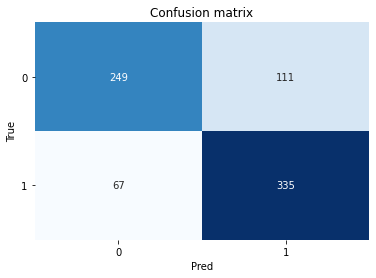

In [20]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, lr.predict(X_test_dtm), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AUC: 0.82


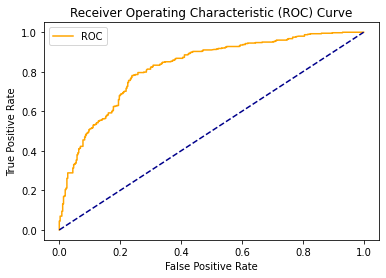

In [21]:
# roc curve and auc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = lr.predict_proba(X_test_dtm)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### SVM

In [22]:
%%time

svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01]}

sv = svm.SVC()

svm_clf = GridSearchCV(sv, svm_params, verbose=5, n_jobs=-1)
svm_clf.fit(X_train_dtm, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   39.1s finished


CPU times: user 714 ms, sys: 143 ms, total: 857 ms
Wall time: 39.8 s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [23]:
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [24]:
svm_params = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1000, 100, 10, 1, 0.1, 0.01]}

sv = svm.SVC()

svm_clf = GridSearchCV(sv, svm_params, verbose=5, n_jobs=-1)
svm_clf.fit(X_train_dtm, y_train)
svm_clf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   44.5s finished


{'C': 10, 'gamma': 1}

In [25]:
sv = svm.SVC(C=100, gamma=1)

sv.fit(X_train_dtm, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
metrics.accuracy_score(y_test, sv.predict(X_test_dtm))

0.7611548556430446

In [27]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, sv.predict(X_test_dtm)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, sv.predict(X_test_dtm), digits=3, target_names=target_names))

[[256 104]
 [ 78 324]]
              precision    recall  f1-score   support

      Dovish      0.766     0.711     0.738       360
     Hawkish      0.757     0.806     0.781       402

    accuracy                          0.761       762
   macro avg      0.762     0.759     0.759       762
weighted avg      0.761     0.761     0.760       762



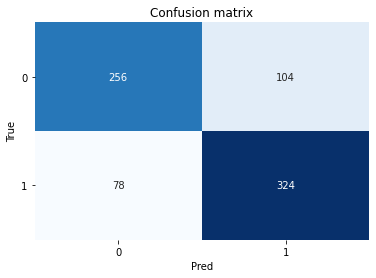

In [28]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, sv.predict(X_test_dtm), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AUC: 0.83


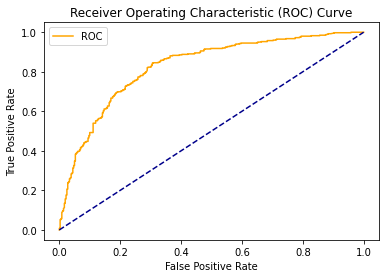

In [30]:
# roc curve and auc
sv = svm.SVC(C=100, gamma=1, probability=True) # made probability=True
sv.fit(X_train_dtm, y_train)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = sv.predict_proba(X_test_dtm)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Naive Bayes

In [31]:
nb = MultinomialNB()

nb.fit(X_train_dtm, y_train)

metrics.accuracy_score(y_test, nb.predict(X_test_dtm))

0.7060367454068242

In [32]:
nb_params = {
    'alpha': [1000,500,100,50,10,7,6,5,4,2,1,0.5,0.1,0.05,0.01,0.005,0.001]
}

clf_nb = GridSearchCV(nb, nb_params, verbose=5, n_jobs=-1)
clf_nb.fit(X_train_dtm, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  78 out of  85 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1000, 500, 100, 50, 10, 7, 6, 5, 4, 2, 1,
                                   0.5, 0.1, 0.05, 0.01, 0.005, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [33]:
clf_nb.best_params_

{'alpha': 4}

In [36]:
nb = MultinomialNB(alpha=2)

nb.fit(X_train_dtm, y_train)

metrics.accuracy_score(y_test, nb.predict(X_test_dtm))

0.7047244094488189

In [37]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, nb.predict(X_test_dtm)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, nb.predict(X_test_dtm), digits=3, target_names=target_names))

[[201 159]
 [ 66 336]]
              precision    recall  f1-score   support

      Dovish      0.753     0.558     0.641       360
     Hawkish      0.679     0.836     0.749       402

    accuracy                          0.705       762
   macro avg      0.716     0.697     0.695       762
weighted avg      0.714     0.705     0.698       762



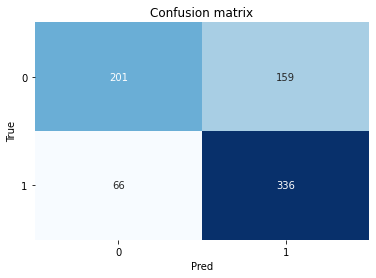

In [38]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, nb.predict(X_test_dtm), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AUC: 0.80


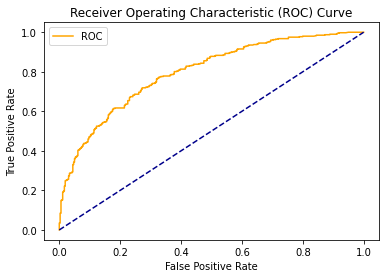

In [39]:
# roc curve and auc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = nb.predict_proba(X_test_dtm)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### XGBoost Model

In [40]:
%%time

xg_params = {'max_depth': range(3,10,1), 
             'min_child_weight': range(1,8,2)
            }

xg = XGBClassifier()

xg_clf = GridSearchCV(xg, xg_params, verbose=5, n_jobs=-1)
xg_clf.fit(X_train_dtm, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.5s


[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.527, total=   3.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.520, total=   2.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.520, total=   2.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.521, total=   2.8s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.724, total=   1.6s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.702, total=   2.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.721, total=   2.2s
[CV] C

[CV] .................... C=10000, gamma=1, score=0.769, total=   0.9s[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.524, total=   4.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.521, total=   2.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.518, total=   2.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.518, total=   2.9s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.715, total=   1.6s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.724, total=   2.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..

[CV] .................. C=10000, gamma=0.1, score=0.680, total=   1.0s[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.522, total=   3.9s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   2.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.521, total=   2.6s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.719, total=   2.8s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.780, total=   1.6s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.749, total=   2.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ..

[CV] .................... C=10000, gamma=1, score=0.735, total=   0.9s[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   4.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.521, total=   2.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.518, total=   2.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.518, total=   3.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.749, total=   1.5s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.721, total=   2.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min



[CV] C=10000, gamma=0.1 ..............................................
[CV] .................. C=10000, gamma=0.1, score=0.732, total=   1.0s
[CV] C=10000, gamma=0.01 .............................................
[CV] ................. C=10000, gamma=0.01, score=0.676, total=   1.7s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.520, total=   0.1s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.518, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.521, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.518, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.534, total=   0.0s
[CV] 

[16:09:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] C=10000, gamma=0.1 ..............................................
[CV] .................. C=10000, gamma=0.1, score=0.670, total=   1.0s
[CV] C=10000, gamma=0.01 .............................................
[CV] ................. C=10000, gamma=0.01, score=0.701, total=   1.7s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.521, total=   0.1s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.518, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, 

[16:09:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] C=10000, gamma=0.1 ..............................................
[CV] .................. C=10000, gamma=0.1, score=0.715, total=   1.0s
[CV] C=10000, gamma=0.01 .............................................
[CV] ................. C=10000, gamma=0.01, score=0.693, total=   1.6s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.518, total=   0.1s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.520, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, 

[16:09:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] C=10000, gamma=0.01 .............................................
[CV] ................. C=10000, gamma=0.01, score=0.660, total=   1.6s
[CV] C=10000, gamma=0.01 .............................................
[CV] ................. C=10000, gamma=0.01, score=0.620, total=   0.9s
[CV] alpha=1000 ......................................................
[CV] .......................... alpha=1000, score=0.521, total=   0.2s
[CV] alpha=4 .........................................................
[CV] ............................. alpha=4, score=0.710, total=   0.0s
[CV] alpha=2 .........................................................
[CV] ............................. alpha=2, 

[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  3.1min finished
/opt/miniconda3/envs/fomc2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 3.2 s, sys: 285 ms, total: 3.48 s
Wall time: 3min 4s


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monoton...
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_

In [41]:
xg_clf.best_params_

{'max_depth': 7, 'min_child_weight': 1}

In [42]:
%%time

xg_params_updated = {'max_depth': range(1,11,2), 
             'min_child_weight': range(1,21,2)
            }

xg = XGBClassifier()

xg_clf_updated = GridSearchCV(xg, xg_params_updated, verbose=5, n_jobs=-1)
xg_clf_updated.fit(X_train_dtm, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s



[CV] ..... max_depth=4, min_child_weight=3, score=0.697, total=  18.2s
[CV] max_depth=4, min_child_weight=3 .................................
[16:09:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=4, min_child_weight=3, score=0.704, total=   5.1s
[CV] max_depth=4, min_child_weight=5 .................................
[16:09:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=4, min_child_weight=5, score=0.713, total=   1.7s
[CV] max_d

[16:11:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=4, min_child_weight=7, score=0.704, total=   3.0s
[CV] max_depth=5, min_child_weight=1 .................................
[16:09:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=5, min_child_weight=1, score=0.710, total=   4.8s
[CV] max_depth=5, min_child_weight=1 .................................
[16:09:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:11:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=5, min_child_weight=5, score=0.708, total=  11.6s
[CV] max_depth=5, min_child_weight=5 .................................
[16:10:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=5, min_child_weight=5, score=0.685, total=  10.6s
[CV] max_depth=5, min_child_weight=7 .................................
[16:10:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:11:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=5, min_child_weight=7, score=0.721, total=   4.7s
[CV] max_depth=6, min_child_weight=1 .................................
[16:10:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=6, min_child_weight=1, score=0.724, total=   6.0s
[CV] max_depth=6, min_child_weight=1 .................................
[16:10:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.4s



[CV] ..... max_depth=7, min_child_weight=7, score=0.732, total=   3.0s
[CV] max_depth=8, min_child_weight=1 .................................
[16:11:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=8, min_child_weight=1, score=0.749, total=   4.2s
[CV] max_depth=8, min_child_weight=1 .................................
[16:11:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=8, min_child_weight=1, score=0.732, total=   4.0s
[CV] max_d

[16:13:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=8, min_child_weight=5, score=0.699, total=   2.7s
[CV] max_depth=8, min_child_weight=5 .................................
[16:11:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=8, min_child_weight=5, score=0.707, total=   3.3s
[CV] max_depth=8, min_child_weight=7 .................................
[16:11:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:13:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=9, min_child_weight=1, score=0.716, total=   7.8s
[CV] max_depth=9, min_child_weight=3 .................................
[16:11:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=9, min_child_weight=3, score=0.691, total=   9.5s
[CV] max_depth=9, min_child_weight=3 .................................
[16:11:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:13:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=9, min_child_weight=3, score=0.735, total=   3.7s
[CV] max_depth=9, min_child_weight=5 .................................
[16:11:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=9, min_child_weight=5, score=0.730, total=   2.8s
[CV] max_depth=9, min_child_weight=7 .................................
[16:11:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min



[CV] .... max_depth=1, min_child_weight=11, score=0.690, total=   1.0s
[CV] max_depth=1, min_child_weight=13 ................................
[16:13:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=1, min_child_weight=13, score=0.685, total=   0.5s
[CV] max_depth=1, min_child_weight=15 ................................
[16:13:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=1, min_child_weight=15, score=0.648, total=   1.0s
[CV] max_d

[16:13:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=1, min_child_weight=17, score=0.634, total=   0.8s
[CV] max_depth=1, min_child_weight=19 ................................
[16:13:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=1, min_child_weight=19, score=0.673, total=   0.5s
[CV] max_depth=3, min_child_weight=1 .................................
[16:13:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:14:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=3, min_child_weight=1, score=0.746, total=   2.0s
[CV] max_depth=3, min_child_weight=3 .................................
[16:13:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=3, min_child_weight=3, score=0.715, total=   1.4s
[CV] max_depth=3, min_child_weight=5 .................................
[16:13:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:14:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=3, min_child_weight=5, score=0.715, total=   1.6s
[CV] max_depth=3, min_child_weight=7 .................................
[16:13:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=3, min_child_weight=7, score=0.690, total=   1.4s
[CV] max_depth=3, min_child_weight=9 .................................
[16:13:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:14:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=5, min_child_weight=1, score=0.710, total=   2.9s
[CV] max_depth=5, min_child_weight=3 .................................
[16:13:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=5, min_child_weight=3, score=0.688, total=   2.0s
[CV] max_depth=5, min_child_weight=3 .................................
[16:13:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished
/opt/miniconda3/envs/fomc2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 3.64 s, sys: 216 ms, total: 3.85 s
Wall time: 2min 30s


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monoton...
                                     predictor=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_

In [43]:
xg_clf_updated.best_params_

{'max_depth': 7, 'min_child_weight': 1}

In [46]:
xg = XGBClassifier(max_depth=5, min_child_weight=1)

xg.fit(X_train_dtm, y_train)

metrics.accuracy_score(y_test, xg.predict(X_test_dtm))

[16:16:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7440944881889764

In [47]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, xg.predict(X_test_dtm)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, xg.predict(X_test_dtm), digits=3, target_names=target_names))

[[254 106]
 [ 89 313]]
              precision    recall  f1-score   support

      Dovish      0.741     0.706     0.723       360
     Hawkish      0.747     0.779     0.762       402

    accuracy                          0.744       762
   macro avg      0.744     0.742     0.743       762
weighted avg      0.744     0.744     0.744       762



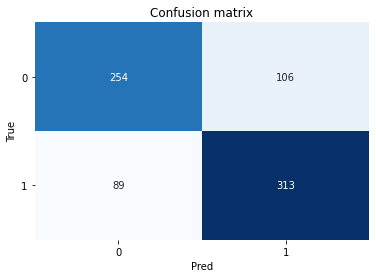

In [48]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, xg.predict(X_test_dtm), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AUC: 0.80


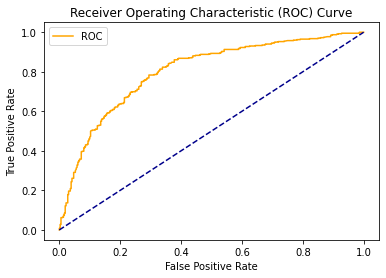

In [49]:
# roc curve and auc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = xg.predict_proba(X_test_dtm)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Decision Tree

In [50]:
%%time

dt_params = {'criterion': ['gini', 'entropy'], 
             'splitter': ['best', 'random'], 
             'max_depth': [2, 3, 4, 5, 10, 15, 20, 25, 30], 
             'min_samples_split': [2, 3, 5, 7, 9, 15, 30, 50, 100],
             'min_samples_leaf': [1, 2, 5, 10],
            }

dt = tree.DecisionTreeClassifier()

dt_clf = GridSearchCV(dt, dt_params, verbose=5, n_jobs=-1)
dt_clf.fit(X_train_dtm, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s



[CV] .... max_depth=5, min_child_weight=11, score=0.716, total=   1.9s
[CV] max_depth=5, min_child_weight=11 ................................
[16:14:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=5, min_child_weight=11, score=0.679, total=   2.6s
[CV] max_depth=5, min_child_weight=13 ................................
[16:14:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=5, min_child_weight=13, score=0.696, total=   7.6s
[CV] max_d

[16:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... max_depth=7, min_child_weight=9, score=0.679, total=   2.5s
[CV] max_depth=7, min_child_weight=11 ................................
[16:14:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=7, min_child_weight=11, score=0.679, total=   2.4s
[CV] max_depth=7, min_child_weight=13 ................................
[16:14:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[16:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=7, min_child_weight=15, score=0.679, total=   2.3s
[CV] max_depth=7, min_child_weight=17 ................................
[16:15:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=7, min_child_weight=17, score=0.685, total=   2.0s
[CV] max_depth=7, min_child_weight=19 ................................
[16:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    2.1s



[CV] .... max_depth=9, min_child_weight=17, score=0.673, total=   2.8s
[CV] max_depth=9, min_child_weight=19 ................................
[16:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... max_depth=9, min_child_weight=19, score=0.687, total=   1.6s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.544, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.558, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_lea

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.575, total=   0.0s
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.620, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.580, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.620, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.580, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samp

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.592, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=best, score=0.575, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=random, score=0.610, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=random, score=0.555, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=30, splitter=random, score=0.603, total=   0.0s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.549, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.575, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.601, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.544, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.575, total=   0.0s
[CV] criterion=gini, max_depth=2, min_sample

[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=100, splitter=random, score=0.556, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.580, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.575, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=random, score=0.573, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=9, splitter=random, score=0.552, total=   0.0s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.648, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.637, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.587, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.569, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.654, total=   0.0s
[CV] criterion=gini, max_depth=3, min_

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=50, splitter=best, score=0.648, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.552, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.639, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.608, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.600, total=   0.0s
[CV] criterion=gini, max_depth=3,

[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.606, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.606, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.637, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.601, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.549, total=   0.0s
[CV] criterion=gini, max_depth=3, min_s

[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, splitter=best, score=0.606, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.612, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.642, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.606, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.634, total=   0.0s
[CV] criterion=gini, max_depth=3, mi

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.640, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.632, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.606, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.642, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.606, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samp

[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:    6.0s



[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9, splitter=random, score=0.549, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9, splitter=random, score=0.651, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.635, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.600, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_

[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.639, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.606, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.645, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.637, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_l

[CV]  criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.628, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=3, splitter=random, score=0.631, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=3, splitter=random, score=0.623, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=3, splitter=random, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.642, total=   0.0s
[CV] criterion=gini, max_depth=4, min

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.651, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.637, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=random, score=0.612, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=random, score=0.572, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=10, min_samples_split=2, splitter=random, score=0.651, total=   0.0s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.638, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.651, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.646, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.608, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.620, total=   0.0s
[CV] criterion=gini, max_depth=5, mi

[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=15, splitter=random, score=0.643, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.662, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.628, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.645, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_sample

[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random, score=0.685, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=best, score=0.628, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=best, score=0.645, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.646, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.575, total=   0.0s
[CV] criterion=gini, max_depth=5

[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best, score=0.611, total=   0.0s
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.645, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.629, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.614, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random, score=0.637, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=5, min_s

[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, splitter=random, score=0.603, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, splitter=random, score=0.620, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.651, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random, score=0.607, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samp

[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=best, score=0.648, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best, score=0.668, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best, score=0.628, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best, score=0.639, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=random, score=0.618, total=   0.0s
[CV] criterion=gini, max_dept

[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.586, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.611, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=100, splitter=best, score=0.632, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=100, splitter=best, score=0.611, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_le

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.642, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.683, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.645, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.696, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.676, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.611, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=random, score=0.657, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best, score=0.691, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best, score=0.625, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=best, score=0.673, total=   0.0s
[CV] criterion=gini, max_depth=10, 

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.637, total=   0.0s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.673, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.654, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.648, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.680, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=1

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=15, splitter=best, score=0.669, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.642, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.680, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.611, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.665, total=   0.1s
[CV] criterion=gini, max_depth


[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.662, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.645, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.651, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.652, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=10, min_sample

[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=15, splitter=best, score=0.608, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.651, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.654, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=10, min_sample

[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:   18.4s


[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.663, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.625, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.687, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.676, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.642, total=   0.0s
[CV] criterion

[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.651, total=   0.0s
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.673, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.645, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=100, splitter=best, score=0.677, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=100, splitter=best, score=0.620, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criter

[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=7, splitter=random, score=0.637, total=   0.1s
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, splitter=random, score=0.639, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.697, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.637, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=15, splitter=random, score=0.676, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_de

[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.637, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=best, score=0.654, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.708, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.659, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=15, splitter=best, score=0.683, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.645, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.631, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.637, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=30, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=30, splitter=best, score=0.694, total=   0.1s
[CV] criterion=gini,

[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=5, splitter=random 
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=7, splitter=random, score=0.662, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.691, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.634, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.670, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_sam

[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, splitter=random, score=0.642, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.668, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.645, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.685, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.623, total=   0.2s
[CV] criterion=gini, max_depth

[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=15, splitter=best, score=0.625, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.679, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.715, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.654, total=   0.0s
[CV] criterion=gini, max_depth=15, min_sample

[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=30, splitter=best, score=0.668, total=   0.4s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.659, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.685, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.654, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.668, total=   0.0s
[CV] criterion=gini,

[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.656, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.679, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.687, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.628, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=15,

[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.685, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=7, splitter=random, score=0.662, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=7, splitter=random, score=0.690, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=7, splitter=random, score=0.631, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=30, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=30, splitter=best, score=0.665, total=   0.3s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=30, splitter=random 
[CV]  criterion=gini, max

[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.654, total=   0.1s
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.701, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.651, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, splitter=best, score=0.668, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.666, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_

[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=9, splitter=random, score=0.668, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.702, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.668, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.670, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.710, total=   0.1s
[CV] criterion=

[CV] criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=best, score=0.665, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=best, score=0.651, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=best, score=0.701, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=7, splitter=random, score=0.683, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_sampl

[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.654, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=30, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=30, splitter=random, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=30, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=30, splitter=random, score=0.642, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.669, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, 

[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.631, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=3, splitter=random, score=0.670, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=3, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=3, splitter=random, score=0.648, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=5, splitter=best, score=0.688, total=   0.1s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_lea

[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=30, splitter=random, score=0.623, total=   0.1s
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.690, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.690, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.685, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.716, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.671, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.685, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.665, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=random, score=0.628, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=random, score=0.662, total=   0.0s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.656, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.680, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.628, total=   0.2s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.662, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.662, total=   0.1s
[CV] criterion=gini, max_depth=25, min

[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.656, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.670, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.701, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.645, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=

[Parallel(n_jobs=-1)]: Done 3050 tasks      | elapsed:   41.9s



[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.685, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.687, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.659, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=100, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=100, splitter=best, score=0.693, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=100, splitter=random 
[CV]  criterion=gini, max_depth=25, min_sa

[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=30, splitter=random, score=0.676, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=30, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=30, splitter=random, score=0.637, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.677, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.623, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=gini, max_depth=25, min_sample

[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.711, total=   0.1s
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.699, total=   0.1s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.699, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.645, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.651, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  crite

[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, splitter=best, score=0.651, total=   0.2s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.662, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.693, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.670, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.670, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=random 
[CV]  criterion=gini, max_depth

[CV] criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.662, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.659, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.682, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.699, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=

[CV]  criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=2, splitter=random, score=0.687, total=   0.0s
[CV]  criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.707, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.676, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.679, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=100, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=100, splitter=random, score=0.648, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=5, min_samples_split=100, splitter=random 
[CV]  crite

[CV]  criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=best, score=0.656, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.690, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.656, total=   0.1s
[CV] criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.699, total=   0.2s
[CV] criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=9, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=9, splitter=random, score=0.697, total=   0.0s
[CV] criterion=gini, max_dep

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=30, splitter=random, score=0.555, total=   0.0s
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.580, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.600, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.601, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.611, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=100, splitter=ra

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=30, splitter=best, score=0.601, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=30, splitter=random, score=0.628, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=30, splitter=random, score=0.552, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=30, splitter=random, score=0.589, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.601, total=   0.0s
[

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random, score=0.625, total=   0.0s
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.601, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.552, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.617, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.580, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV] 

[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   50.2s



[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random, score=0.645, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random, score=0.597, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random, score=0.566, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=9, splitter=best, score=0.632, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=3, 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.558, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.555, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.600, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.611, total=   0.0s
[CV] criterio

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=3, splitter=random, score=0.563, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.611, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=best, score=0.637, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random, score=0.649, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random, score=0.558, total=   0.0s
[CV]

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=30, splitter=random, score=0.566, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.603, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.634, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=2, splitter=random, score=0.598, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=5, splitter=best 
[CV]  c

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.642, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=30, splitter=random, score=0.608, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=30, splitter=random, score=0.625, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=30, splitter=random, score=0.597, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.639, total=   0.

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.651, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=30, splitter=random, score=0.639, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.635, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.589, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.651, total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=random, score=0.628, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.623, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.642, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.593, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.620, total=   0.0s
[CV] 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.638, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.640, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.597, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.645, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.617, total=   0.1s
[CV] criterion=entropy

[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.603, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.645, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.623, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=7, splitter=best, score=0.637, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_sa

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=best, score=0.651, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=100, splitter=best, score=0.637, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=10, min_samples_split=100, splitter=random, score=0.640, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best, score=0.640, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best, score=0.594, total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.625, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.674, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best, score=0.645, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best, score=0.614, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best, score=0.645, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=best, score=0.645, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=best, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=best, score=0.620, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=best, score=0.651, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30, splitter=random, score=0.598, total=   0.0s
[CV] criter

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.625, total=   0.0s
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.645, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.629, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.586, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.637, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitte

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=5, splitter=random, score=0.634, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.656, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.620, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.631, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.640, total=   0.0

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=15, splitter=best, score=0.637, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random, score=0.654, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random, score=0.608, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=9, splitter=random, score=0.665, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.642, total=   0.0s
[CV] cr

[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best 
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.638, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.592, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.645, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=9, splitter=best, score=0.623, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_s

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.669, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=best, score=0.645, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=best, score=0.623, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=best, score=0.637, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=10, min_samples_split=30, splitter=random, score=0.596, total=   0.0s

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.642, total=   0.0s
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best, score=0.656, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best, score=0.654, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=best, score=0.639, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=random, score=0.685, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, splitter=random 
[CV]  

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.639, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.608, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.679, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.688, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.623, total=   0.1s
[CV]

[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random, score=0.645, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=7, splitter=best, score=0.642, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.651, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random, score=0.685, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.614, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=15, splitter=random, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=30, splitter=best, score=0.688, total=   

[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best 
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=best, score=0.642, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.652, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.642, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.687, total=   0.0s
[CV] criterion=entrop

[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=30, splitter=best, score=0.603, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=30, splitter=best, score=0.668, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=30, splitter=best, score=0.651, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=100, splitter=best, score=0.674, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max

[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best, score=0.680, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best, score=0.617, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best, score=0.668, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=3, splitter=best, score=0.637, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.639, total=   0.1s
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.654, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.642, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.617, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=30, splitter=best, score=0.668, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=30, split

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.713, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.637, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.665, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.645, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.654, total=   0.2s
[CV] criterion

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.663, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.673, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=50, splitter=random, score=0.606, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.694, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.631, total=

[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, splitter=best 
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.639, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.654, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.645, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.651, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_

[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=best 
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.651, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=7, splitter=best, score=0.662, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=7, splitter=best, score=0.656, total=   0.1s
[CV] criterion=entropy, max_depth

[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=best [CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.625, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.694, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best, score=0.648, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=15, splitter=random, score=0.668, total=   0.0s
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.673, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.648, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=random, score=0.638, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=50, splitter=rand

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=random, score=0.679, total=   0.1s
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.656, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.654, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.657, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, splitter=random, score=0.623, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=50, spl

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.688, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5, splitter=random, score=0.656, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5, splitter=random, score=0.668, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.648, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=15, splitter=best, score=0.651, total=   0.1s


[Parallel(n_jobs=-1)]: Done 5780 tasks      | elapsed:  1.3min



[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random, score=0.674, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random, score=0.634, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random, score=0.676, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random, score=0.673, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=7, splitter=random 
[CV]  criterion=entropy

[CV] criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=100, splitter=random 
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.651, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.670, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.670, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=9, splitter=random, score=0.656, total=   0.0s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=random, score=0.631, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.656, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.606, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.683, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=2, splitter=random, score=0.628, total=   0.0s
[CV

[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=100, splitter=random, score=0.670, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=100, splitter=random, score=0.696, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.656, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=7, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=7, splitter=random, score=0.623, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=best 
[CV]  criterion

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=30, splitter=random, score=0.656, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=random, score=0.693, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=random, score=0.668, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=9, splitter=random, score=0.648, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=15, splitter=best, score=0.688, tot

[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.683, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.642, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.685, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.659, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, m

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.673, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.685, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.631, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.662, total=   0.2s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=100, splitter=best, score=0.679, total=   0.1

[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=best, score=0.691, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, splitter=best, score=0.642, total=   0.2s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.645, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.656, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=50, splitter=best, score=0.680, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=best, score=0.603, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.669, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.688, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.642, total=   0.1s
[CV] 

[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.685, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.659, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=15, splitter=random, score=0.659, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=30, splitter=best, score=0.696, total=   0.2s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=5, min_samples_split=30, splitter=random 
[CV]  criterion=entro

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=random, score=0.654, total=   0.1s
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.685, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=2, splitter=best, score=0.639, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=3, splitter=best, score=0.693, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=3, splitter=best, score=0.642, total=   0.1s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=10, min_samples_split=5, splitter=best 
[CV]

[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=9, splitter=random 
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=random, score=0.668, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=random, score=0.701, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=random, score=0.645, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random, score=0.670, total=   0.1s
[CV] criterion=entropy, 

[Parallel(n_jobs=-1)]: Done 6440 tasks      | elapsed:  1.6min



[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=best, score=0.679, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter=best, score=0.715, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best, score=0.642, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random, score=0.683, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=7, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=7, splitter=best, score=0.651, total=   0.1s
[CV] crit

[CV] criterion=entropy, max_depth=30, min_samples_leaf=5, min_samples_split=3, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=9, splitter=random, score=0.699, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=9, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=9, splitter=random, score=0.654, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=random, score=0.639, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=15, splitter=random, score=0.676, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=30, splitter=best 
[CV]  criterion=entro

[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [51]:
dt_clf.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [63]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=1, min_samples_split=3, splitter='random')

dt.fit(X_train_dtm, y_train)

metrics.accuracy_score(y_test, dt.predict(X_test_dtm))

0.678477690288714

In [64]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, dt.predict(X_test_dtm)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, dt.predict(X_test_dtm), digits=3, target_names=target_names))

[[181 179]
 [ 66 336]]
              precision    recall  f1-score   support

      Dovish      0.733     0.503     0.596       360
     Hawkish      0.652     0.836     0.733       402

    accuracy                          0.678       762
   macro avg      0.693     0.669     0.665       762
weighted avg      0.690     0.678     0.668       762



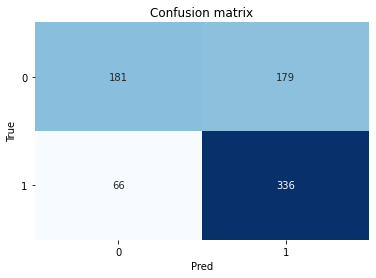

In [65]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, dt.predict(X_test_dtm), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AUC: 0.72


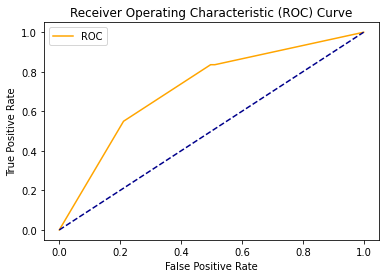

In [66]:
# roc curve and auc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = dt.predict_proba(X_test_dtm)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### KNN Model

In [67]:
%%time

knn_params = {'n_neighbors': np.arange(1,100,2)}

knn = KNeighborsClassifier()

knn_clf = GridSearchCV(knn, knn_params, verbose=5, n_jobs=-1)
knn_clf.fit(X_train_dtm, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s



[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.711, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=9, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=9, splitter=best, score=0.656, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.659, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=15, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=15, splitter=best, score=0.693, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=30, splitter=best, score=0.670, total=   0.1s
[CV] cr

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.4s


ax_depth=30, min_samples_leaf=2, min_samples_split=50, splitter=random, score=0.670, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=100, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=100, splitter=best, score=0.639, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=100, splitter=random, score=0.699, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.674, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=5, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=5, min_samples_split=2, splitter=best, score=0.651, total=   0.1s
[CV] criterion=entropy, m

[CV] criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100, splitter=best CPU times: user 575 ms, sys: 53.8 ms, total: 629 ms
Wall time: 10.6 s


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [68]:
knn_clf.best_params_

{'n_neighbors': 21}

In [69]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train_dtm, y_train)

metrics.accuracy_score(y_test, knn.predict(X_test_dtm))

0.6902887139107612

In [70]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, knn.predict(X_test_dtm)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, knn.predict(X_test_dtm), digits=3, target_names=target_names))

[[200 160]
 [ 76 326]]
              precision    recall  f1-score   support

      Dovish      0.725     0.556     0.629       360
     Hawkish      0.671     0.811     0.734       402

    accuracy                          0.690       762
   macro avg      0.698     0.683     0.682       762
weighted avg      0.696     0.690     0.684       762



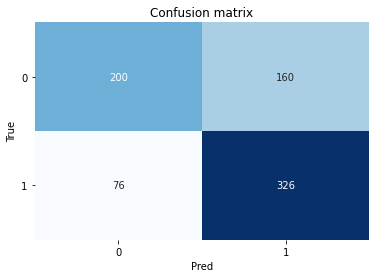

In [71]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, knn.predict(X_test_dtm), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AUC: 0.74


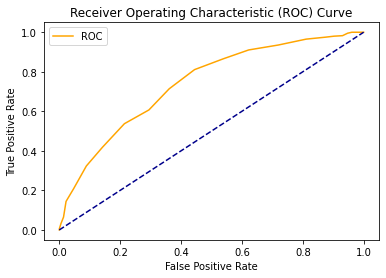

In [72]:
# roc curve and auc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = knn.predict_proba(X_test_dtm)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Ensemble Models

In [74]:
base_models = [
    ('lr', lr),
    # ('sv', sv),
    ('nb', nb),
    ('xg', xg),
    ('dt', dt),
    ('knn', knn)
]

# meta_model = LogisticRegression(max_iter=1000)
meta_model = svm.SVC(C=100, gamma=1, probability=True)

In [75]:
%%time

stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1, verbose=5)
stacked_model.fit(X_train_dtm, y_train)

[16:22:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.[16:22:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.[16:22:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.[16:22:59] WARNING: /Users/runner/miniforge3/conda-b

CPU times: user 889 ms, sys: 98.5 ms, total: 988 ms
Wall time: 4.87 s


StackingClassifier(cv=None,
                   estimators=[('lr',
                                LogisticRegression(C=1, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('nb',
                                MultinomialNB(alpha=2, class_prior=None,
                               

In [76]:
stacked_model.score(X_test_dtm, y_test)

0.7519685039370079

In [231]:
%%time

stacked_model_svm = StackingClassifier(estimators=base_models, final_estimator=lr, n_jobs=-1, verbose=5)
stacked_model_svm.fit(X_train_dtm, y_train)

[16:47:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:04] WARNING: /Users/runner/miniforge3/cond

CPU times: user 58.4 ms, sys: 9.92 ms, total: 68.3 ms
Wall time: 4.86 s


StackingClassifier(cv=None,
                   estimators=[('lr',
                                LogisticRegression(C=1, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('nb',
                                MultinomialNB(alpha=2, class_prior=None,
                               

In [232]:
stacked_model_svm.score(X_test_dtm, y_test)

0.7677165354330708

In [233]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, stacked_model_svm.predict(X_test_dtm)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, stacked_model_svm.predict(X_test_dtm), digits=3, target_names=target_names))

[[256 104]
 [ 73 329]]
              precision    recall  f1-score   support

      Dovish      0.778     0.711     0.743       360
     Hawkish      0.760     0.818     0.788       402

    accuracy                          0.768       762
   macro avg      0.769     0.765     0.766       762
weighted avg      0.768     0.768     0.767       762



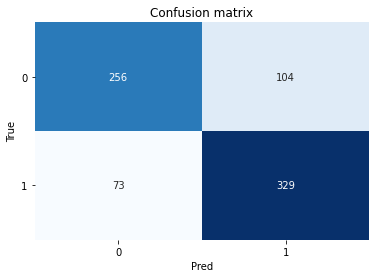

In [234]:
# -1 -> 0 (DOVISH)
# 1 -> 1 (HAWKISH)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, stacked_model_svm.predict(X_test_dtm), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AUC: 0.80


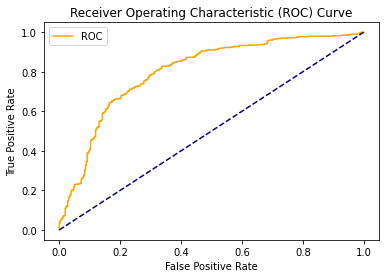

In [88]:
# roc curve and auc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = stacked_model_svm.predict_proba(X_test_dtm)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [95]:
def model_performance(models, model_names):
    #create empty df with col names
    df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC'])

    for n, model in enumerate(models):

        y_pred = model.predict(X_test_dtm)

        name = model_names[n]

        acc = metrics.accuracy_score(y_test, y_pred)
        prec = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        roc_auc = metrics.roc_auc_score(y_test, y_pred)

        #append row to df
        df = df.append(
            {
                'Model' : name,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': recall,
                'F1 score': f1,
                'ROC AUC': roc_auc
            }, ignore_index = True)

    return df.set_index('Model').transpose()

In [235]:
model_performance([lr, sv, nb, xg, dt, knn, stacked_model_svm], ['lr', 'sv', 'nb', 'xg', 'dt', 'knn', 'stack'])

Model,lr,sv,nb,xg,dt,knn,stack
Accuracy,0.766404,0.761155,0.704724,0.744094,0.678478,0.690289,0.767717
Precision,0.751121,0.757009,0.678788,0.747017,0.652427,0.670782,0.759815
Recall,0.833333,0.805970,0.835821,0.778607,0.835821,0.810945,0.818408
F1 score,0.790094,0.780723,0.749164,0.762485,0.732824,0.734234,0.788024
ROC AUC,0.762500,0.758541,0.697077,0.742081,0.669299,0.683250,0.764760



[CV] criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100, splitter=random, score=0.680, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.638, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.663, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.718, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.589, total=   0.1s
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.699, total=   0.1s
[CV] n_neighbors=7 ............................................

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/opt/miniconda3/envs/fomc2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarnin


[CV] ...................... n_neighbors=45, score=0.635, total=   0.2s
[CV] n_neighbors=45 ..................................................
[CV] ...................... n_neighbors=45, score=0.690, total=   0.1s
[CV] n_neighbors=47 ..................................................
[CV] ...................... n_neighbors=47, score=0.701, total=   0.3s
[CV] n_neighbors=47 ..................................................
[CV] ...................... n_neighbors=47, score=0.665, total=   0.1s
[CV] n_neighbors=49 ..................................................
[CV] ...................... n_neighbors=49, score=0.640, total=   0.2s
[CV] n_neighbors=49 ..................................................
[CV] ...................... n_neighbors=49, score=0.676, total=   0.3s
[CV] n_neighbors=53 ..................................................
[CV] ...................... n_neighbors=53, score=0.666, total=   0.4s
[CV] n_neighbors=53 ..................................................
[CV] 

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
/opt/miniconda3/envs/fomc2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finish


[CV]  criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100, splitter=best, score=0.679, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.704, total=   0.2s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.634, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.626, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.665, total=   0.1s
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.682, total=   0.1s
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.690, total=   0.0s
[CV] n_neighbors=9 ...

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
/opt/miniconda3/envs/fomc2/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurr


[CV] criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=30, splitter=best, score=0.688, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=30, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=30, splitter=best, score=0.642, total=   0.2s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.685, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=50, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=50, splitter=best, score=0.642, total=   0.1s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100, splitter=best 
[CV]  criterion=entrop

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remain

### Finalised Model

In [147]:
# # save model to pickle
# import pickle

# # save the model to disk
# filename = '../data/db/pickle/finalized_model_tuned.pickle'
# dbfile =  open(filename, 'wb')
# pickle.dump(stacked_model_svm, dbfile)
# dbfile.close()

# # save the model to disk
# filename = '../data/db/pickle/tfidf_vect_tuned.pickle'
# dbfile =  open(filename, 'wb')
# pickle.dump(tfidf_vect, dbfile)
# dbfile.close()